In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("Trendix_Dataset.csv")

In [3]:
df.head()

,Serial_No,Fashion_type,Product_id,Brand_Name,category,Description,Rating,Rating_count,Price,Actual_Price,Discount,size,product_description,image_ref,file_path,image_url,Specifications,Rating_as_stars
0,1,blazers,17464542.0,H&M,women-clothing,Women Black Fitted Jacket,4.4,951,2299.0,NaN,NaN,"['XXS', 'XS', 'S', 'M', 'L', 'XL', 'XXL', '3XL']",Fitted jacket in woven fabric with notch lapel...,blazers_women-clothing_17464542.jpg,C:/Users/harsh/OneDrive/Desktop/AI & DS/Step 2...,"https://assets.myntassets.com/h_720,q_90,w_540...","{'Closure': 'Button', 'Collar': 'Notched Lapel...","{'5': '645', '4': '176', '3': '62', '2': '27',..."
1,2,blazers,24970972.0,Allen Solly Woman,women-clothing,Notched Lapel Collar Single-Breasted Formal Bl...,4.3,643,3959.0,3999.0,(1% OFF),NaN,"Black solid regular-fit formal blazer, has a n...",blazers_women-clothing_24970972.jpg,C:/Users/harsh/OneDrive/Desktop/AI & DS/Step 2...,"https://assets.myntassets.com/h_720,q_90,w_540...","{'Closure': 'Button', 'Collar': 'Notched Lapel...","{'5': '421', '4': '113', '3': '29', '2': '21',..."
2,3,blazers,26893598.0,Arrow,men-clothing,Notched Lapel Long Sleeves Slim-Fit Single Bre...,4.2,161,4879.0,7999.0,(39% OFF),"['36', '38', '40', '42', '44', '46']","Black solid slim-fit formal blazer, has a notc...",blazers_men-clothing_26893598.jpg,C:/Users/harsh/OneDrive/Desktop/AI & DS/Step 2...,"https://assets.myntassets.com/h_720,q_90,w_540...","{'Closure': 'Button', 'Collar': 'Notched Lapel...","{'5': '98', '4': '29', '3': '11', '2': '9', '1..."
3,4,blazers,28844176.0,MANGO,women-clothing,Pure Linen Smart Casual Blazer,4.1,37,6790.0,NaN,NaN,"['XXS', 'XS', 'S', 'M', 'L', 'XL', 'XXL']","Blue solid smart casual blazer, has a peaked l...",blazers_women-clothing_28844176.jpg,C:/Users/harsh/OneDrive/Desktop/AI & DS/Step 2...,"https://assets.myntassets.com/h_720,q_90,w_540...","{'Closure': 'Button', 'Collar': 'Peaked Lapel'...","{'5': '26', '4': '2', '3': '1', '2': '2', '1':..."
4,5,blazers,28774520.0,MANGO,women-clothing,Smart Casual Linen Notched Lapel Single-Breast...,4.0,43,4549.0,6790.0,(33% OFF),"['XS', 'S', 'M', 'L', 'XL', 'XXL']","The solid blazers for women, has notched lapel...",blazers_women-clothing_28774520.jpg,C:/Users/harsh/OneDrive/Desktop/AI & DS/Step 2...,"https://assets.myntassets.com/h_720,q_90,w_540...","{'Closure': 'Button', 'Collar': 'Notched Lapel...","{'5': '30', '4': '2', '3': '1', '2': '3', '1':..."


In [4]:
df.tail()

,Serial_No,Fashion_type,Product_id,Brand_Name,category,Description,Rating,Rating_count,Price,Actual_Price,Discount,size,product_description,image_ref,file_path,image_url,Specifications,Rating_as_stars
24173,994,Women Office Wear,30111247.0,Style Quotient,women-clothing,Women Smart Opaque Formal Shirt,4.0,6,636.0,1299.0,(51% OFF),"['S', 'M', 'L', 'XL']","White solid opaque Formal shirt ,has a spread ...",Women Office Wear_women-clothing_30111247.jpg,C:/Users/DELL/OneDrive/Desktop/AI & DATA SCIEN...,"https://assets.myntassets.com/h_720,q_90,w_540...","{'Sleeve Length': 'Short Sleeves', 'Collar': '...","{'5': '3', '4': '1', '3': '1', '2': '1', '1': ''}"
24174,995,Women Office Wear,27631984.0,Chemistry,women-clothing,Striped Formal Shirt,4.2,43,499.0,1999.0,(75% OFF),"['XS', 'S', 'M', 'XL', 'L']",Black & white vertical striped opaque formal s...,Women Office Wear_women-clothing_27631984.jpg,C:/Users/DELL/OneDrive/Desktop/AI & DATA SCIEN...,"https://assets.myntassets.com/h_720,q_90,w_540...","{'Sleeve Length': 'Long Sleeves', 'Collar': 'S...","{'5': '24', '4': '11', '3': '5', '2': '', '1':..."
24175,996,Women Office Wear,29328582.0,Annabelle by Pantaloons,women-clothing,Women Opaque Formal Shirt,4.6,22,1499.0,NaN,NaN,"['XS', 'S', 'M', 'L', 'XL', 'XXL']","Blue solid opaque Formal shirt ,has a spread c...",Women Office Wear_women-clothing_29328582.jpg,C:/Users/DELL/OneDrive/Desktop/AI & DATA SCIEN...,"https://assets.myntassets.com/h_720,q_90,w_540...","{'Sleeve Length': 'Long Sleeves', 'Collar': 'S...","{'5': '16', '4': '3', '3': '3', '2': '', '1': ''}"
24176,997,Women Office Wear,29173318.0,Cantabil,women-clothing,Spread Collar Formal Shirt,4.4,31,899.0,1999.0,(55% OFF),"['S', 'M', 'L', 'XL', 'XXL', '3XL']","Green solid opaque Formal shirt ,has a spread ...",Women Office Wear_women-clothing_29173318.jpg,C:/Users/DELL/OneDrive/Desktop/AI & DATA SCIEN...,"https://assets.myntassets.com/h_720,q_90,w_540...","{'Sleeve Length': 'Long Sleeves', 'Collar': 'S...","{'5': '21', '4': '7', '3': '', '2': '', '1': '3'}"
24177,998,Women Office Wear,28324258.0,FITHUB,women-clothing,Women Slim Fit High-Rise Formal Trousers,3.8,55,899.0,1999.0,(55% OFF),"['30', '32', '34', '36', '38', '40', '42']",Fit: Slim FitThe model (height 5'8) is wearing...,Women Office Wear_women-clothing_28324258.jpg,C:/Users/DELL/OneDrive/Desktop/AI & DATA SCIEN...,"https://assets.myntassets.com/h_720,q_90,w_540...","{'Waist Rise': 'High-Rise', 'Length': 'Regular...","{'5': '28', '4': '9', '3': '6', '2': '2', '1':..."


In [5]:
#basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24178 entries, 0 to 24177
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Serial_No            24178 non-null  int64  
 1   Fashion_type         24178 non-null  object 
 2   Product_id           24144 non-null  float64
 3   Brand_Name           24144 non-null  object 
 4   category             24144 non-null  object 
 5   Description          24142 non-null  object 
 6   Rating               21947 non-null  float64
 7   Rating_count         21947 non-null  object 
 8   Price                24154 non-null  float64
 9   Actual_Price         21294 non-null  float64
 10  Discount             21283 non-null  object 
 11  size                 21319 non-null  object 
 12  product_description  24130 non-null  object 
 13  image_ref            24142 non-null  object 
 14  file_path            24142 non-null  object 
 15  image_url            24142 non-null 

In [6]:
df['Rating_count'] = pd.to_numeric(df['Rating_count'], errors='coerce')

In [7]:
# Example: Renaming specific columns
df.rename(columns={
    'Price': 'Price_After_Discount',
    'Actual_Price': 'MRP_Price'
}, inplace=True)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24178 entries, 0 to 24177
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Serial_No             24178 non-null  int64  
 1   Fashion_type          24178 non-null  object 
 2   Product_id            24144 non-null  float64
 3   Brand_Name            24144 non-null  object 
 4   category              24144 non-null  object 
 5   Description           24142 non-null  object 
 6   Rating                21947 non-null  float64
 7   Rating_count          17211 non-null  float64
 8   Price_After_Discount  24154 non-null  float64
 9   MRP_Price             21294 non-null  float64
 10  Discount              21283 non-null  object 
 11  size                  21319 non-null  object 
 12  product_description   24130 non-null  object 
 13  image_ref             24142 non-null  object 
 14  file_path             24142 non-null  object 
 15  image_url          

In [9]:
df.columns

Index(['Serial_No', 'Fashion_type', 'Product_id', 'Brand_Name', 'category',
       'Description', 'Rating', 'Rating_count', 'Price_After_Discount',
       'MRP_Price', 'Discount', 'size', 'product_description', 'image_ref',
       'file_path', 'image_url', 'Specifications', 'Rating_as_stars'],
      dtype='object')

In [10]:
#summary statistics
df.describe()

,Serial_No,Product_id,Rating,Rating_count,Price_After_Discount,MRP_Price
count,24178.000000,2.414400e+04,21947.000000,17211.000000,24154.000000,21294.000000
mean,745.369385,2.428805e+07,4.170684,179.650282,1742.143165,3228.989668
std,512.354450,6.038245e+06,0.363585,225.828766,1987.131462,2253.140049
min,1.000000,1.503240e+05,1.000000,5.000000,179.000000,299.000000
25%,318.000000,2.163112e+07,4.000000,22.000000,728.000000,1659.000000
50%,662.000000,2.581962e+07,4.200000,78.000000,1149.000000,2499.000000
75%,1081.000000,2.914472e+07,4.400000,243.000000,1974.000000,3999.000000
max,2000.000000,3.096750e+07,5.000000,999.000000,70000.000000,19999.000000


In [11]:
# Check for missing values in the DataFrame
missing_values = df.isnull().sum()
print(missing_values)

Serial_No                  0
Fashion_type               0
Product_id                34
Brand_Name                34
category                  34
Description               36
Rating                  2231
Rating_count            6967
Price_After_Discount      24
MRP_Price               2884
Discount                2895
size                    2859
product_description       48
image_ref                 36
file_path                 36
image_url                 36
Specifications            44
Rating_as_stars         4176
dtype: int64


## Univariet Analysis

In [13]:
# Summary statistics for numerical features
df.describe()  

,Serial_No,Product_id,Rating,Rating_count,Price_After_Discount,MRP_Price
count,24178.000000,2.414400e+04,21947.000000,17211.000000,24154.000000,21294.000000
mean,745.369385,2.428805e+07,4.170684,179.650282,1742.143165,3228.989668
std,512.354450,6.038245e+06,0.363585,225.828766,1987.131462,2253.140049
min,1.000000,1.503240e+05,1.000000,5.000000,179.000000,299.000000
25%,318.000000,2.163112e+07,4.000000,22.000000,728.000000,1659.000000
50%,662.000000,2.581962e+07,4.200000,78.000000,1149.000000,2499.000000
75%,1081.000000,2.914472e+07,4.400000,243.000000,1974.000000,3999.000000
max,2000.000000,3.096750e+07,5.000000,999.000000,70000.000000,19999.000000


In [14]:
# Include all columns to see categorical data too
df.describe(include = 'all')  

,Serial_No,Fashion_type,Product_id,Brand_Name,category,Description,Rating,Rating_count,Price_After_Discount,MRP_Price,Discount,size,product_description,image_ref,file_path,image_url,Specifications,Rating_as_stars
count,24178.000000,24178,2.414400e+04,24144,24144,24142,21947.000000,17211.000000,24154.000000,21294.000000,21283,21319,24130,24142,24142,24142,24134,20002
unique,NaN,16,NaN,857,12,12650,NaN,NaN,NaN,NaN,476,526,10481,17224,17224,16802,10675,12166
top,NaN,T-Shirt,NaN,Roadster,men-clothing,Polo Collar Pure Cotton Slim Fit T-shirt,NaN,NaN,NaN,NaN,(50% OFF),"['S', 'M', 'L', 'XL', 'XXL']",The model (height 5'8) is wearing a size S,T-Shirt_women-clothing_29361726.jpg,C:/Users/DELL/OneDrive/Desktop/AI & DATA SCIEN...,"https://assets.myntassets.com/h_720,q_90,w_540...","{'Type': 'Loafers', 'Fastening': 'Slip-On', 'T...","{'5': '5', '4': '', '3': '', '2': '', '1': ''}"
freq,NaN,6813,NaN,1080,8834,127,NaN,NaN,NaN,NaN,1445,3647,1614,4,4,4,196,84
mean,745.369385,NaN,2.428805e+07,NaN,NaN,NaN,4.170684,179.650282,1742.143165,3228.989668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,512.354450,NaN,6.038245e+06,NaN,NaN,NaN,0.363585,225.828766,1987.131462,2253.140049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,1.503240e+05,NaN,NaN,NaN,1.000000,5.000000,179.000000,299.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,318.000000,NaN,2.163112e+07,NaN,NaN,NaN,4.000000,22.000000,728.000000,1659.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,662.000000,NaN,2.581962e+07,NaN,NaN,NaN,4.200000,78.000000,1149.000000,2499.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1081.000000,NaN,2.914472e+07,NaN,NaN,NaN,4.400000,243.000000,1974.000000,3999.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Visualizations for Univariate Analysis

## Distribution of Numerical Features

In [17]:
# Get the total number of unique brands
total_brands = df['Brand_Name'].nunique()
print(f'Total number of unique brands: {total_brands}')

Total number of unique brands: 857


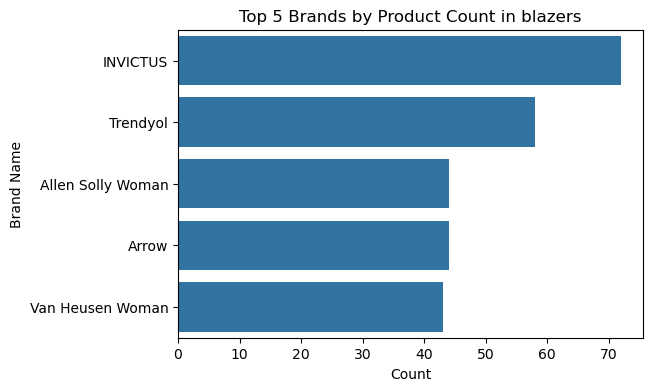

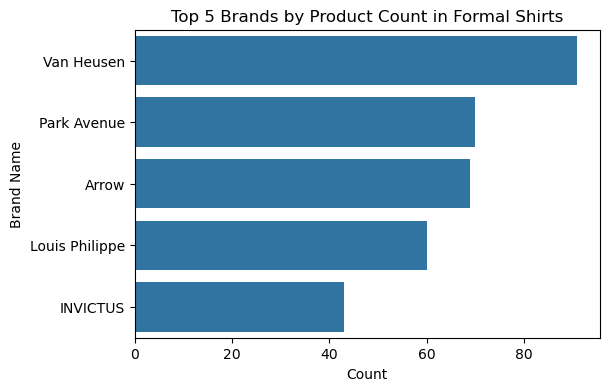

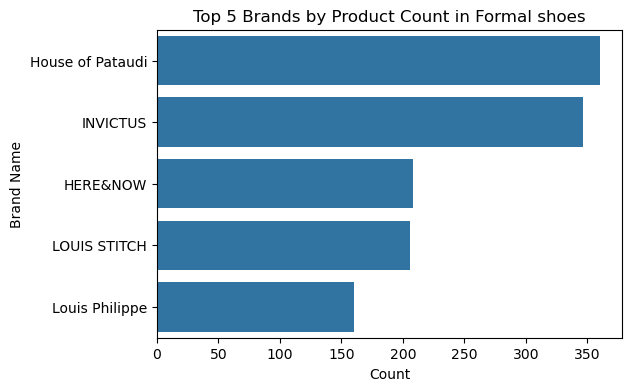

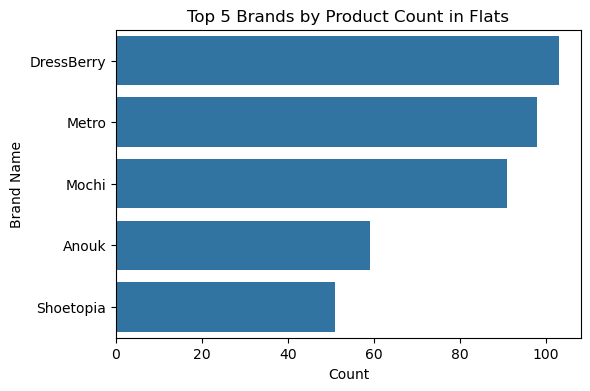

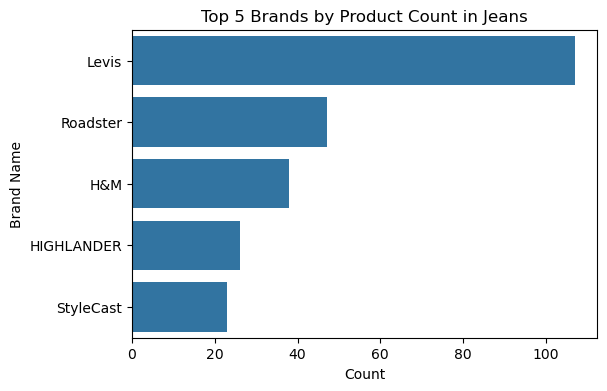

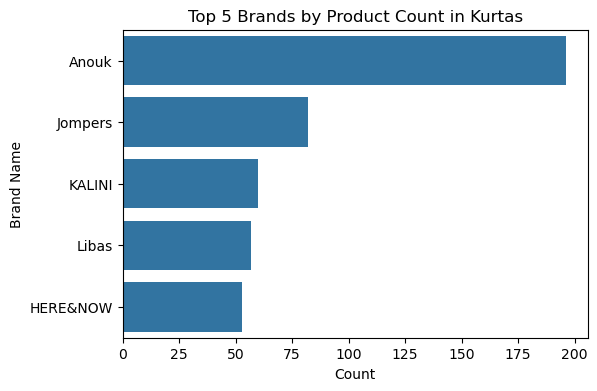

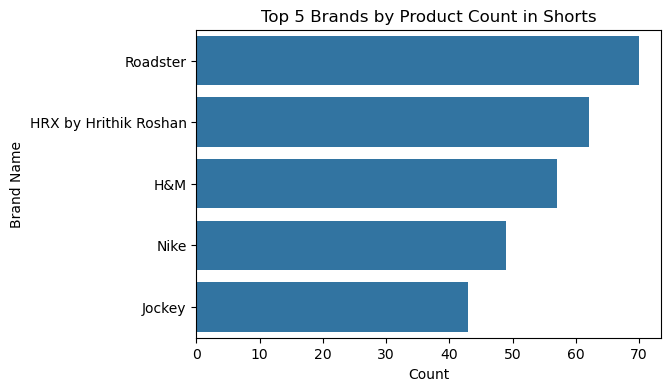

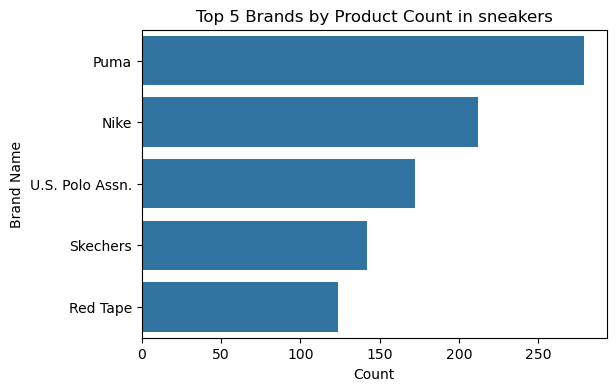

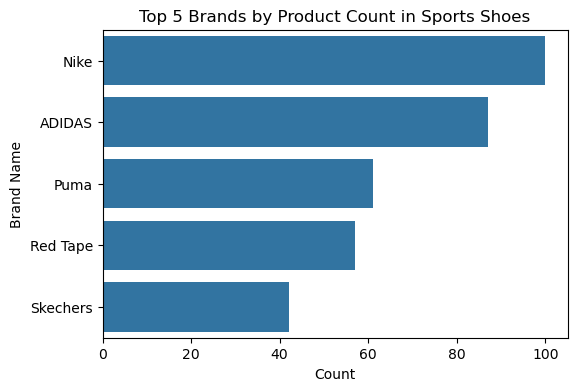

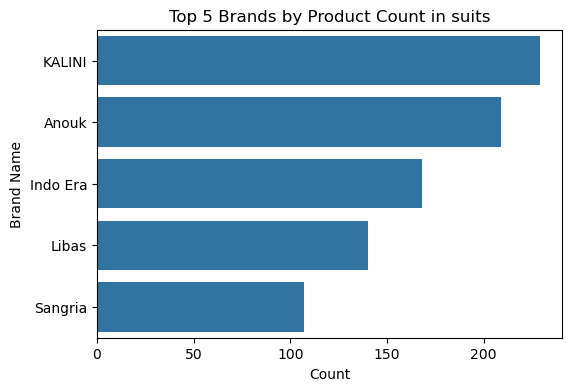

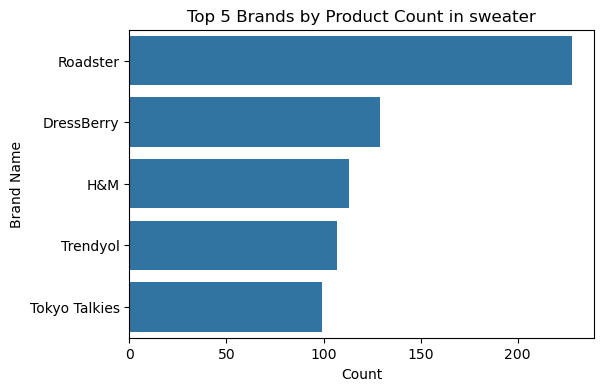

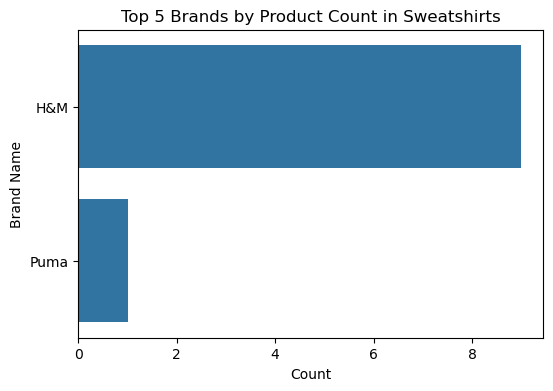

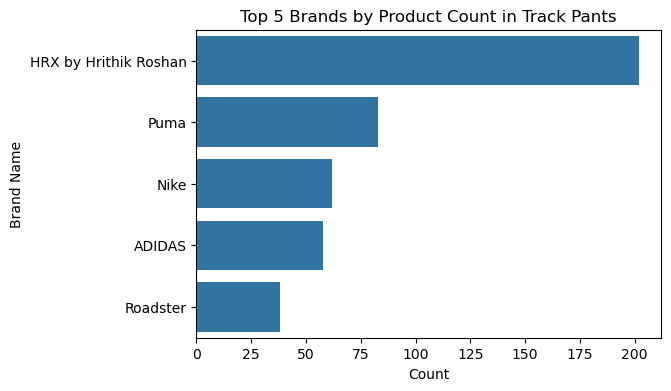

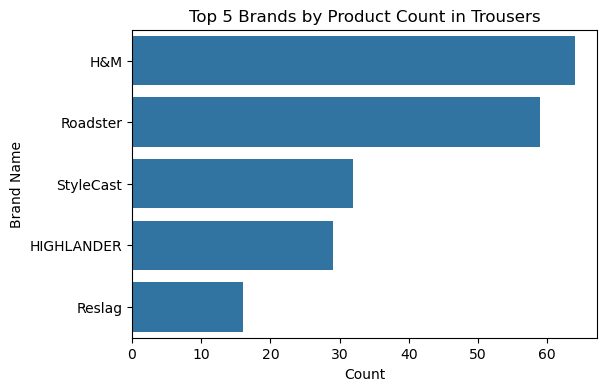

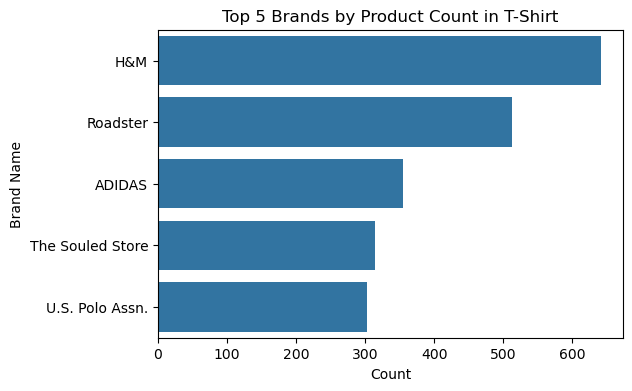

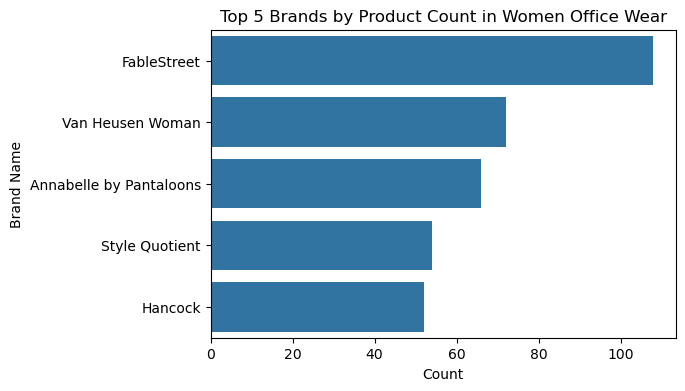

In [18]:
fashion_types = df['Fashion_type'].unique()

for fashion in fashion_types:
    plt.figure(figsize=(6, 4))
    
    # Filter data for the current fashion type
    current_fashion = df[df['Fashion_type'] == fashion]
    
    # Get top N brands for the current fashion type
    top_brands = current_fashion['Brand_Name'].value_counts().nlargest(5)

    # Create the bar plot
    sns.barplot(y=top_brands.index, x=top_brands.values)
    plt.title(f'Top {5} Brands by Product Count in {fashion}')
    plt.xlabel('Count')
    plt.ylabel('Brand Name')
    plt.show()

- These are the top brands for different types of fashion types. 

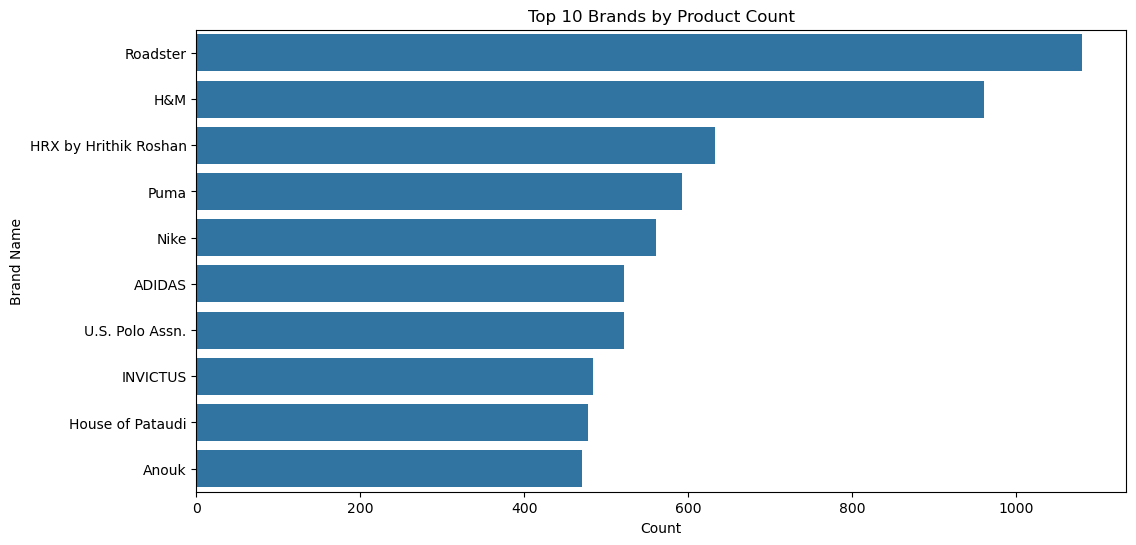

In [20]:
top_n = 10  # You can adjust this number
top_brands = df['Brand_Name'].value_counts().nlargest(top_n)

plt.figure(figsize=(12, 6))
sns.barplot(y=top_brands.index, x=top_brands.values)
plt.title(f'Top {top_n} Brands by Product Count')
plt.xlabel('Count')
plt.ylabel('Brand Name')
plt.show()

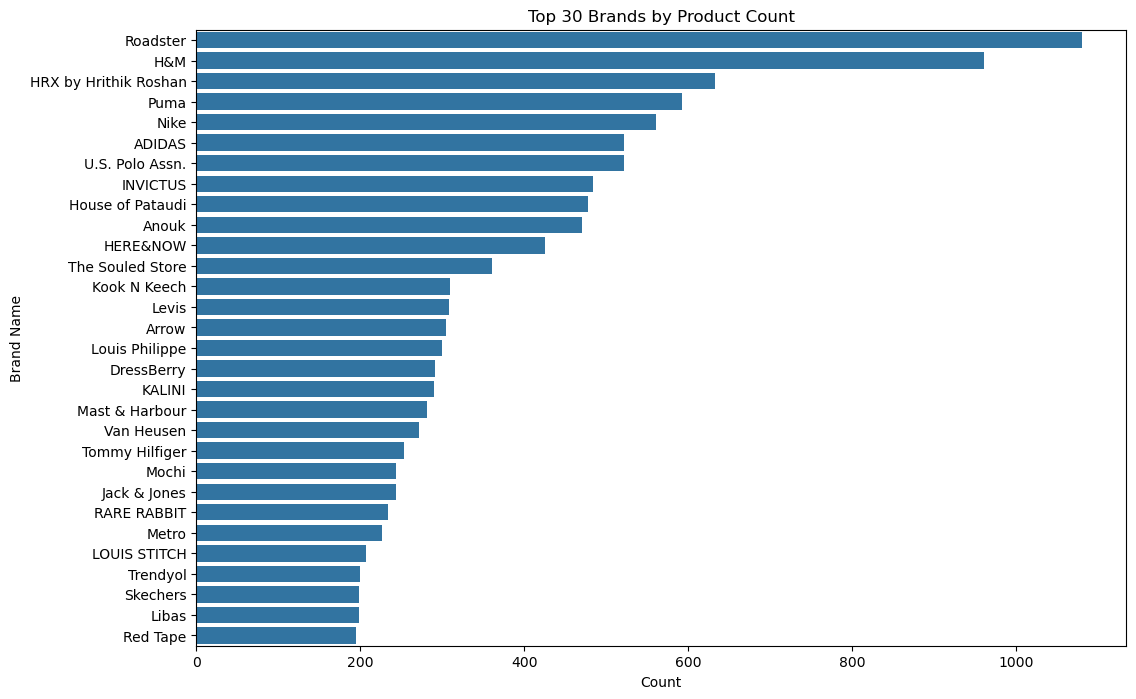

In [21]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Brand_Name', data=df, order=df['Brand_Name'].value_counts().index[:30])  # Limit to top 30 for clarity
plt.title('Top 30 Brands by Product Count')
plt.xlabel('Count')
plt.ylabel('Brand Name')
plt.show()

In [22]:
print(df['category'].unique())

['women-clothing' 'men-clothing' 'boys-clothing' nan 'men-footwear'
 'women-footwear' 'boys-footwear' 'girls-footwear' 'unisex-clothing'
 'girls-clothing' 'unisex-kids-clothing' 'unisex-footwear'
 'unisex-kids-footwear']


In [23]:
# Drop rows where 'category' is NaN
df = df.dropna(subset=['category'])

# Filter for women's and men's fashion types
women_fashion = df[df['category'].str.contains('women', case=False)]
men_fashion = df[df['category'].str.contains('men', case=False)]

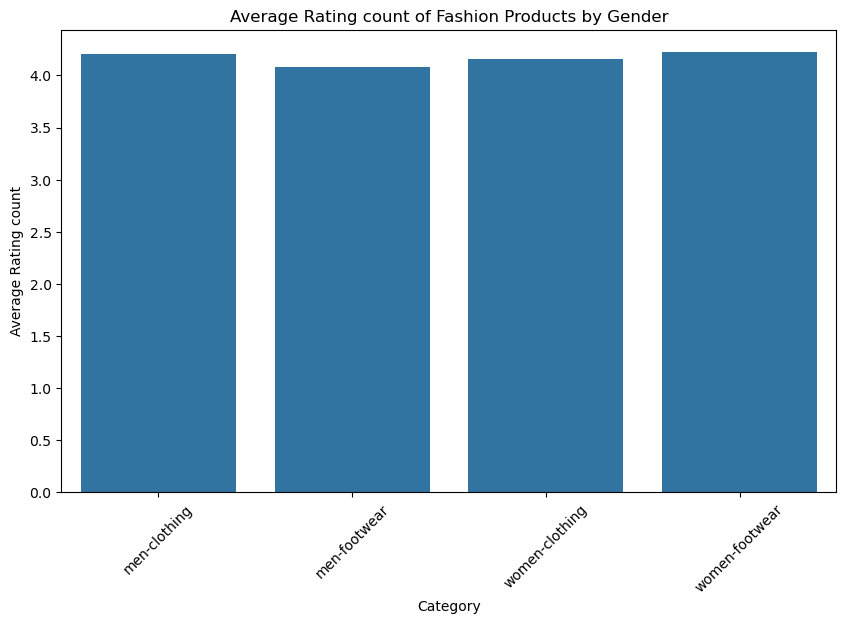

In [24]:
# Calculate average ratings for each category
avg_rating = df[df['category'].str.contains('women|men', case=False)].groupby('category')['Rating'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_rating, x='category', y='Rating')
plt.title('Average Rating count of Fashion Products by Gender')
plt.xlabel('Category')
plt.ylabel('Average Rating count')
plt.xticks(rotation=45)
plt.show()

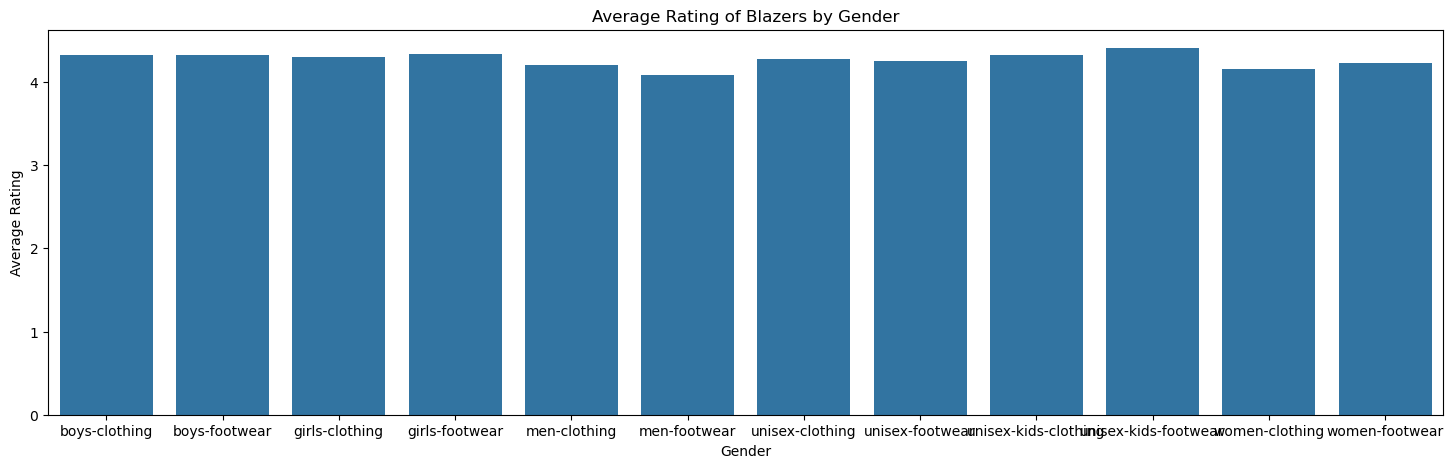

In [89]:
avg_rating = df.groupby('category')['Rating'].mean().reset_index()

plt.figure(figsize=(18, 5))
sns.barplot(data=avg_rating, x='category', y='Rating')
plt.title('Average Rating of Blazers by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Rating')
plt.show()

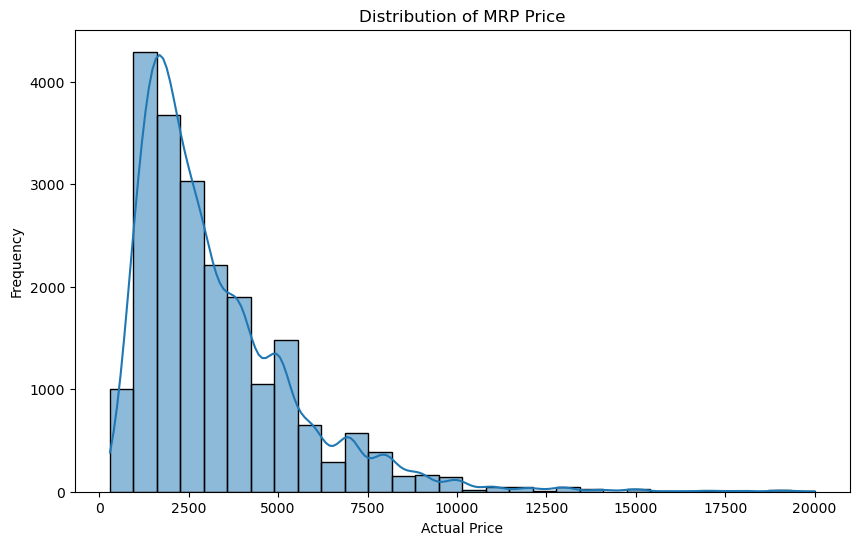

In [26]:
# Histogram for Actual Price
plt.figure(figsize=(10, 6))
sns.histplot(df['MRP_Price'], bins=30, kde=True)
plt.title('Distribution of MRP Price')
plt.xlabel('Actual Price')
plt.ylabel('Frequency')
plt.show()

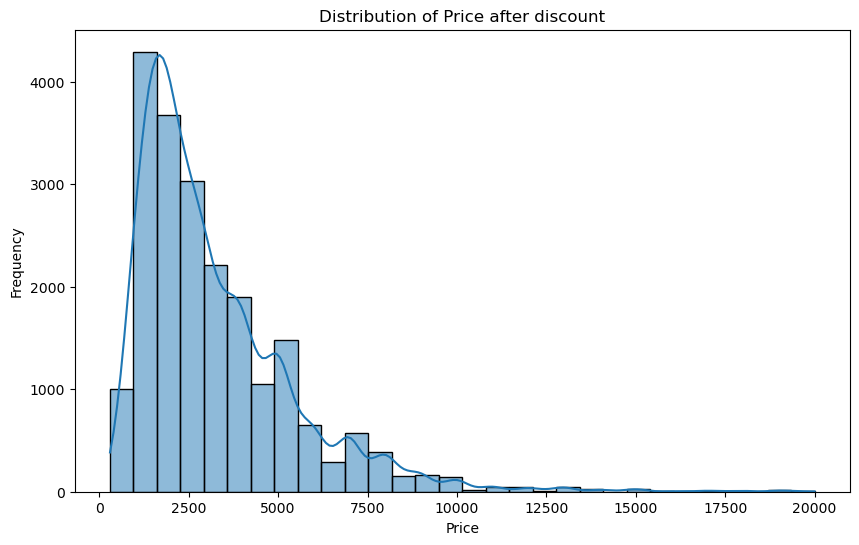

In [27]:
# Histogram for Price
plt.figure(figsize=(10, 6))
sns.histplot(df['MRP_Price'], bins=30, kde=True)
plt.title('Distribution of Price after discount')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

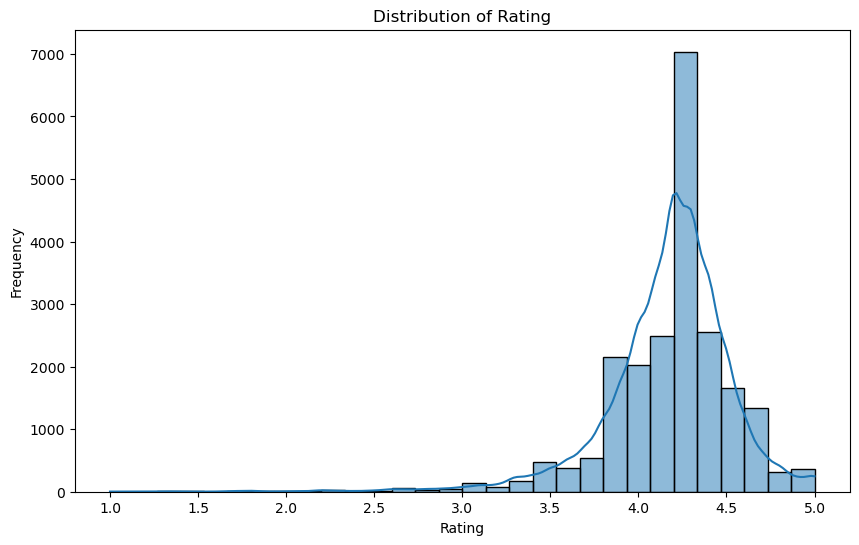

In [28]:
# Histogram for Rating
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=30, kde=True)
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

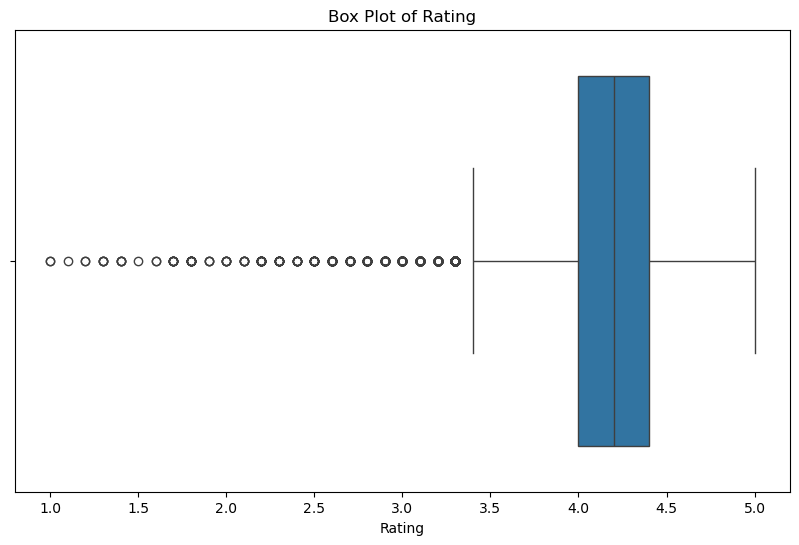

In [29]:
# Box Plot for Rating
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Rating'])
plt.title('Box Plot of Rating')
plt.xlabel('Rating')
plt.show()

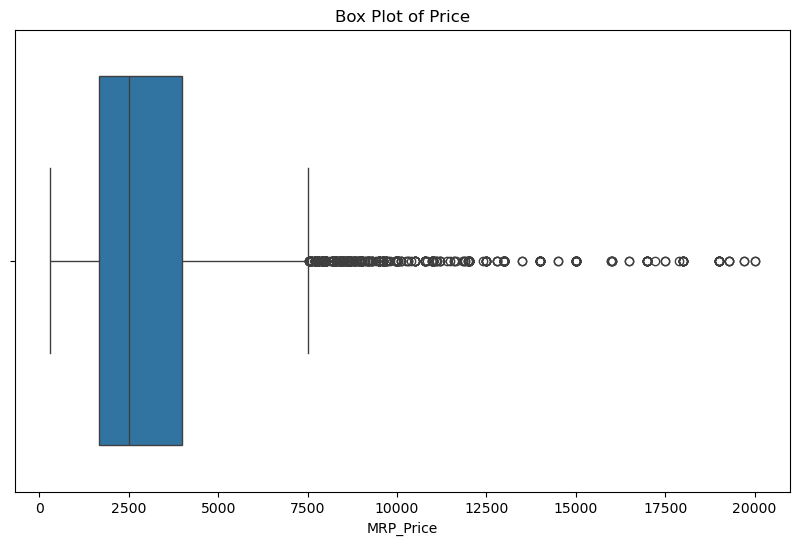

In [30]:
# Box Plot for Price
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['MRP_Price'])
plt.title('Box Plot of Price')
plt.xlabel('MRP_Price')
plt.show()

# Count of Categorical Features

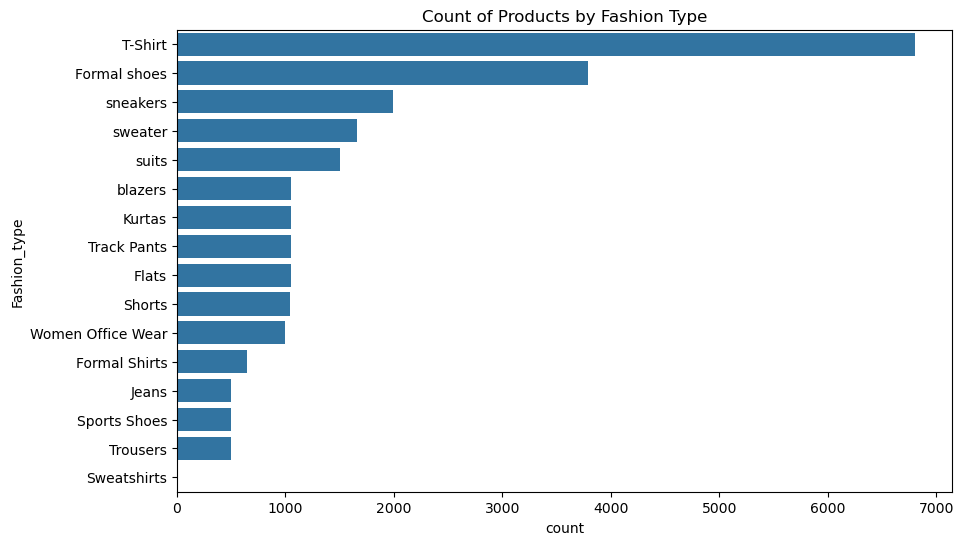

In [32]:
# Count Plot for Fashion Type
plt.figure(figsize=(10, 6))
sns.countplot(y='Fashion_type', data=df, order=df['Fashion_type'].value_counts().index)
plt.title('Count of Products by Fashion Type')
plt.show()

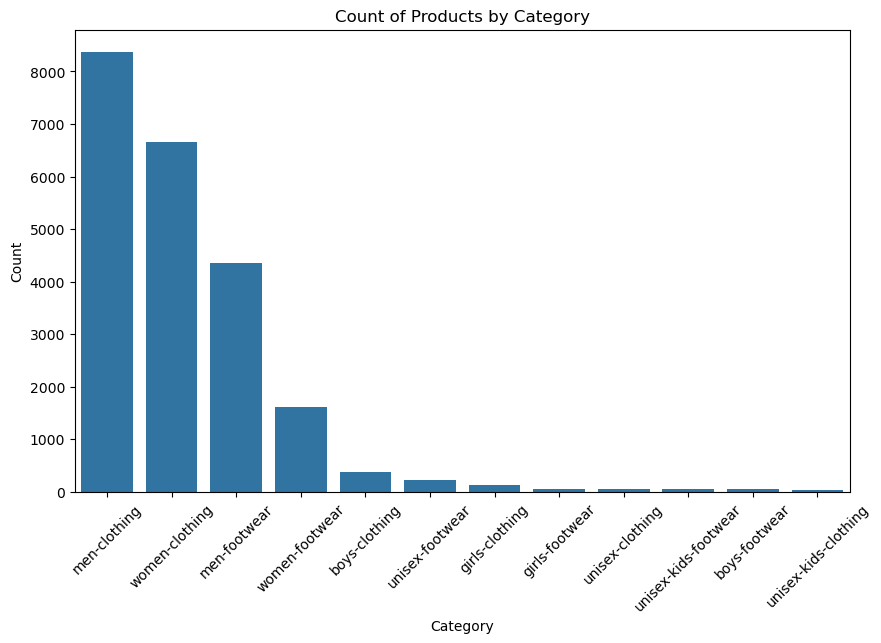

In [101]:
# Count Plot for Category
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=df, order=df['category'].value_counts().index)
plt.title('Count of Products by Category')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.xlabel('Category')  # Add label for x-axis
plt.ylabel('Count')  # Add label for y-axis
plt.show()

# Bivariate Analysis

## Visualizations for Bivariate Analysis

## Scatter Plots for Numerical Variables

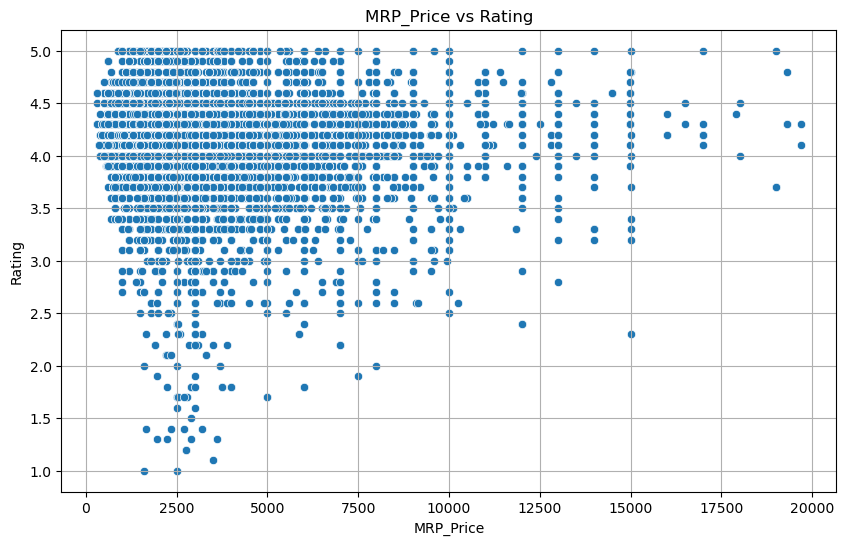

In [37]:
# Scatter Plot for Price vs Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MRP_Price', y='Rating', data=df)
plt.title('MRP_Price vs Rating')
plt.xlabel('MRP_Price')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

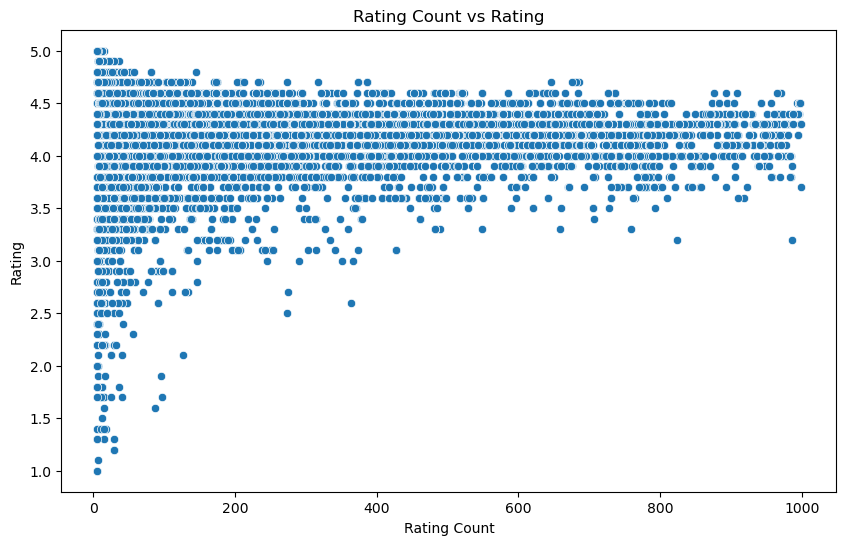

In [38]:
# Scatter Plot for Rating Count vs Rating (after conversion)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating_count', y='Rating', data=df)
plt.title('Rating Count vs Rating')
plt.xlabel('Rating Count')
plt.ylabel('Rating')
plt.show()

## Box Plots for Categorical vs Numerical Variables

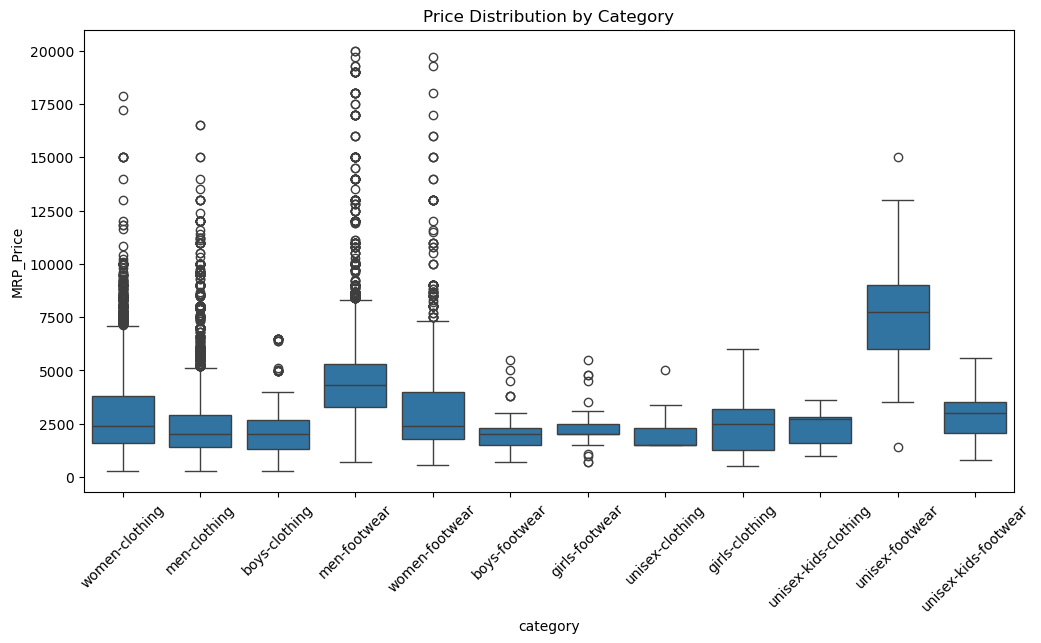

In [40]:
# Box Plot for Price by Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='MRP_Price', data=df)
plt.title('Price Distribution by Category')
plt.xticks(rotation=45)
plt.show()

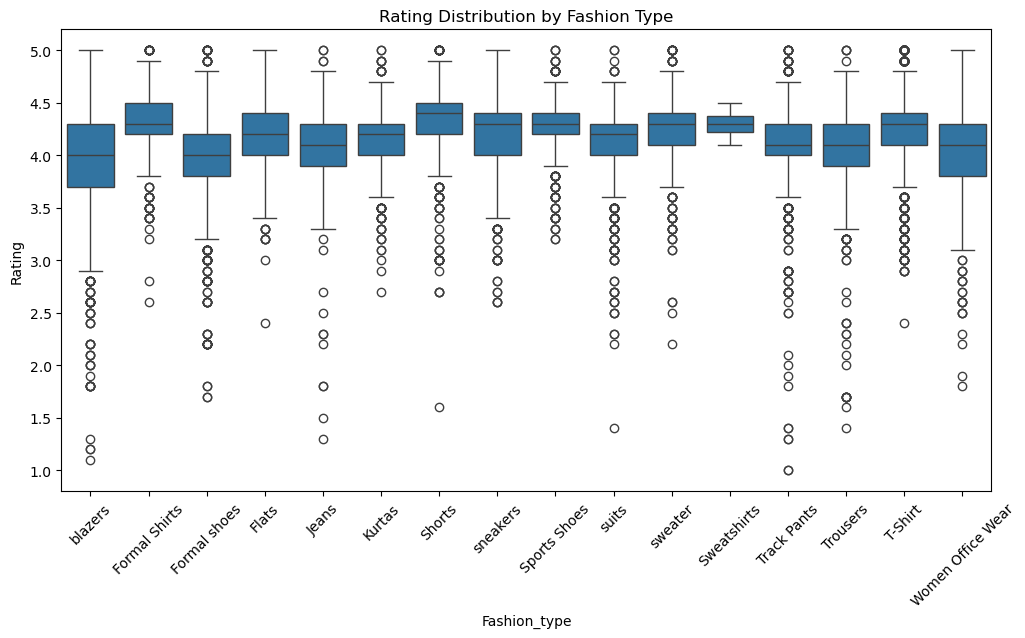

In [41]:
# Box Plot for Rating by Fashion Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Fashion_type', y='Rating', data=df)
plt.title('Rating Distribution by Fashion Type')
plt.xticks(rotation=45)
plt.show()

# Bar Plots for Categorical Analysis

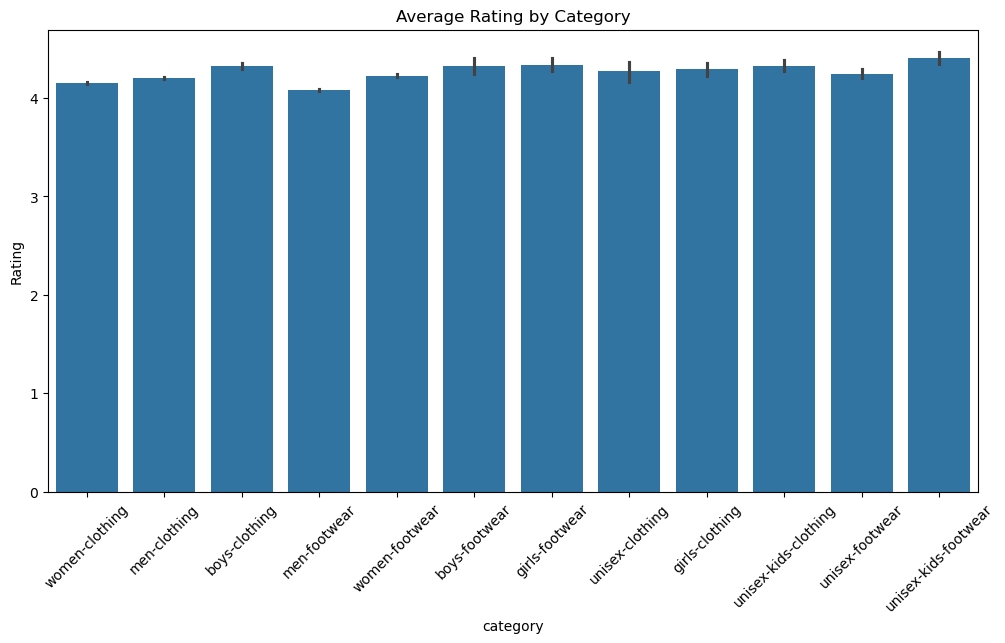

In [43]:
# Bar Plot for Average Rating by Category
plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='Rating', data=df, estimator='mean')
plt.title('Average Rating by Category')
plt.xticks(rotation=45)
plt.show()

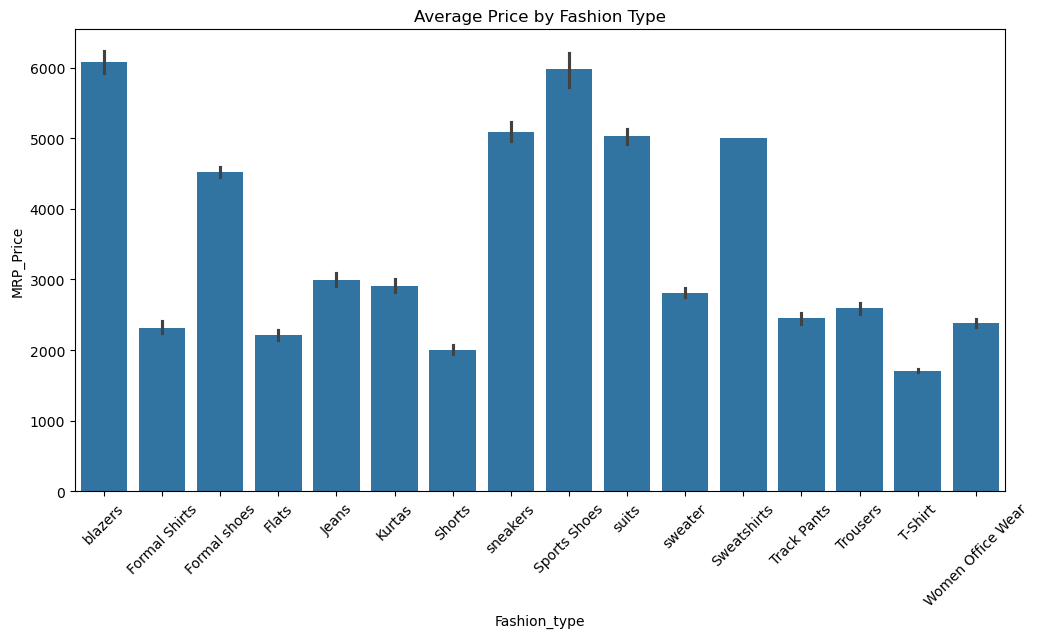

In [44]:
# Bar Plot for Average Price by Fashion Type
plt.figure(figsize=(12, 6))
sns.barplot(x='Fashion_type', y='MRP_Price', data=df, estimator='mean')
plt.title('Average Price by Fashion Type')
plt.xticks(rotation=45)
plt.show()

# Multivarieate Analysis

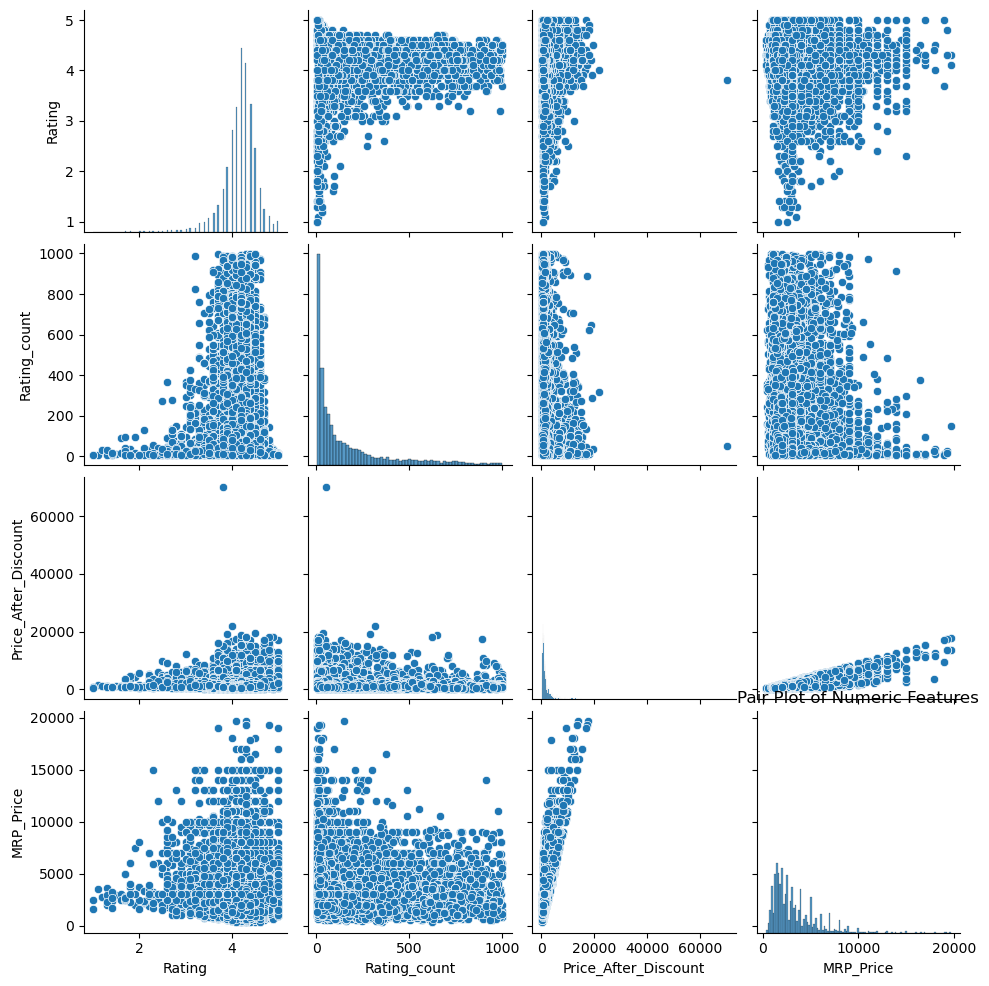

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant numeric columns
numeric_columns = ['Rating', 'Rating_count','Price_After_Discount', 'MRP_Price']  # You can add more if needed
sns.pairplot(df[numeric_columns])
plt.title('Pair Plot of Numeric Features')
plt.show()